In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import seaborn as sns
os.chdir("P:\\Courses\\Kaggle\\Titanic\\Data")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

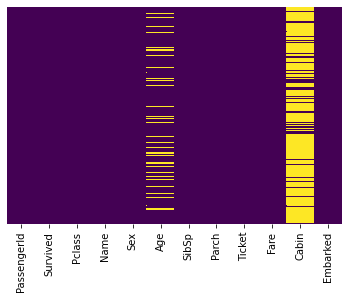

In [6]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

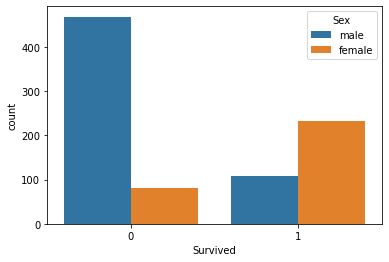

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

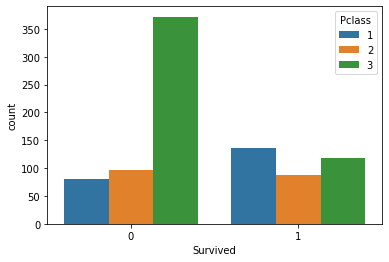

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot:xlabel='Age'>

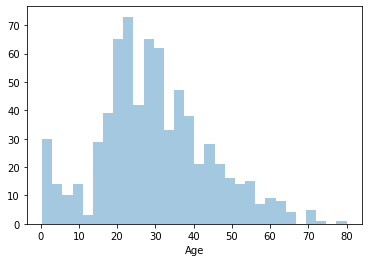

In [9]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

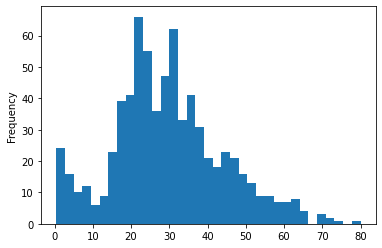

In [10]:
train['Age'].plot.hist(bins=35)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

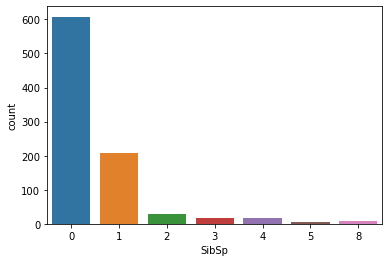

In [11]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

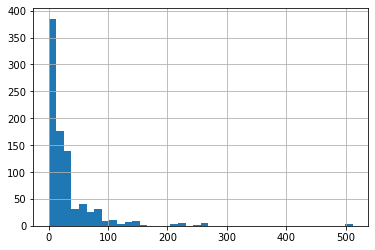

In [12]:
train['Fare'].hist(bins=40)

# Data Handling

In [13]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: 
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [14]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

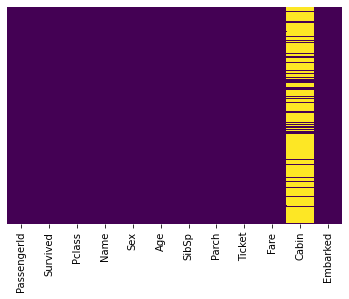

In [15]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [16]:
train.drop(['Cabin'],axis=1,inplace=True)

In [17]:
train.dropna(inplace=True)

<AxesSubplot:>

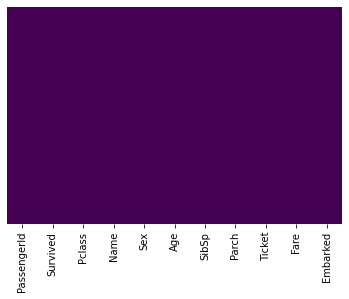

In [18]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

([<matplotlib.axis.XTick at 0x1913aea2c48>,
 [Text(0, 1, 'PassengerId'),
  Text(1, 1, 'Survived'),
  Text(2, 1, 'Pclass'),
  Text(3, 1, 'Name'),
  Text(4, 1, 'Sex'),
  Text(5, 1, 'Age'),
  Text(6, 1, 'SibSp'),
  Text(7, 1, 'Parch'),
  Text(8, 1, 'Ticket'),
  Text(9, 1, 'Fare'),
  Text(10, 1, 'Embarked')])

([<matplotlib.axis.YTick at 0x1913af33288>,
 [Text(0, 0, 'PassengerId'),
  Text(0, 1, 'Survived'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'Name'),
  Text(0, 4, 'Sex'),
  Text(0, 5, 'Age'),
  Text(0, 6, 'SibSp'),
  Text(0, 7, 'Parch'),
  Text(0, 8, 'Ticket'),
  Text(0, 9, 'Fare'),
  Text(0, 10, 'Embarked')])

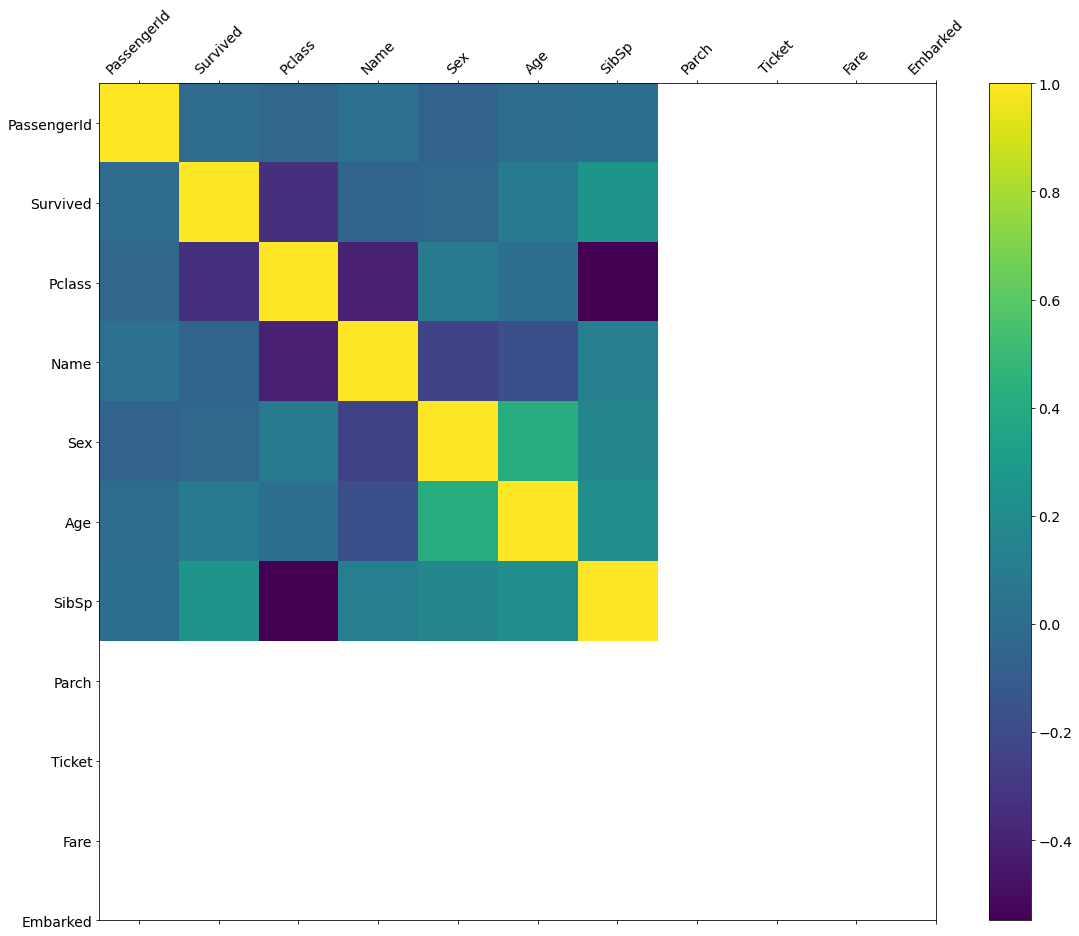

In [19]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Dummy Creation

In [20]:
dums=pd.get_dummies(train[['Sex', 'Embarked']], drop_first=True)

In [21]:
train=pd.concat([train,dums], axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [23]:
train.drop(['Sex', 'Embarked','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# MODEL DEVELOPMENT

In [25]:
X=train.drop(['Survived'], axis=1)
Y=train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=176)

# NN


In [28]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-3, 
                       hidden_layer_sizes=(3), random_state=1, verbose=True)
nn_clf.fit(X_train, Y_train)

y_pred_nn = nn_clf.predict(X_test)

MLPClassifier(alpha=0.001, hidden_layer_sizes=3, random_state=1, solver='lbfgs',
              verbose=True)

In [29]:
nn_clf.loss_

0.6544159678693782

In [31]:
nn_clf.n_layers_

3

In [32]:
w = nn_clf.coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.
w

[array([[-0.1225631 ,  0.31115579, -0.7383588 ],
        [-0.29196575, -0.79503641, -0.60213851],
        [-0.46341107, -0.23495553, -0.15248017],
        [ 0.05733447, -0.12569887,  0.27357948],
        [-0.43654042, -0.30553958, -0.69807474],
        [ 0.25178997, -0.12510301,  0.08668813],
        [-0.53116844, -0.44616156,  0.44421641],
        [ 0.69164832, -0.28154625,  0.28407117]]),
 array([[-1.12904815],
        [-0.38099145],
        [ 0.92622958]])]

In [33]:
b = nn_clf.intercepts_ # The ith element in the list represents the bias vector corresponding to layer i + 1.
b

[array([ 0.55596362,  0.57306061, -0.61293032]), array([-0.56783891])]

In [34]:
nn_clf.out_activation_

'logistic'

In [35]:
def relu_af(x):
    return max(0, x)
    
x = [0.5, 1]

layer_id=0
h0 = (x[0] * w[layer_id][0][0]) + ((x[1] * w[layer_id][1][0])) + (1 * b[layer_id][0])
print(h0)
print(relu_af(h0))

h1 = (x[0] * w[layer_id][0][1]) + ((x[1] * w[layer_id][1][1])) + (1 * b[layer_id][1])
print(h1)
print(relu_af(h1))

h2 = (x[0] * w[layer_id][0][2]) + ((x[1] * w[layer_id][1][2])) + (1 * b[layer_id][2])
print(h2)
print(relu_af(h2))

layer_id=1
o = (h0 * w[layer_id][0][0]) + ((h1 * w[layer_id][1][0])) + ((h2 * w[layer_id][2][0])) + (1 * b[layer_id][0])
print(o)
print(relu_af(o))

0.20271631758334974
0.20271631758334974
-0.06639790145086377
0
-1.5842482275710628
0
-2.238795929695822
0


In [36]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, y_pred_nn))

[[152   0]
 [115   0]]


In [37]:
from sklearn.metrics import classification_report

In [41]:
feature_names = X.columns
class_names = [str(x) for x in nn_clf.classes_]

In [42]:
print(classification_report(Y_test, y_pred_nn, target_names=class_names))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       152
           1       0.00      0.00      0.00       115

    accuracy                           0.57       267
   macro avg       0.28      0.50      0.36       267
weighted avg       0.32      0.57      0.41       267



C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss, roc_curve, auc
print("Accuracy = {:.2f}".format(accuracy_score(Y_test, y_pred_nn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(Y_test, y_pred_nn)))
print("F1 Score = {:.2f}".format(f1_score(Y_test, y_pred_nn)))
print("Log Loss = {:.2f}".format(log_loss(Y_test, y_pred_nn)))

Accuracy = 0.57
Kappa = 0.00
F1 Score = 0.00
Log Loss = 14.88


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred_nn)

array([[152,   0],
       [115,   0]], dtype=int64)

In [52]:
def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

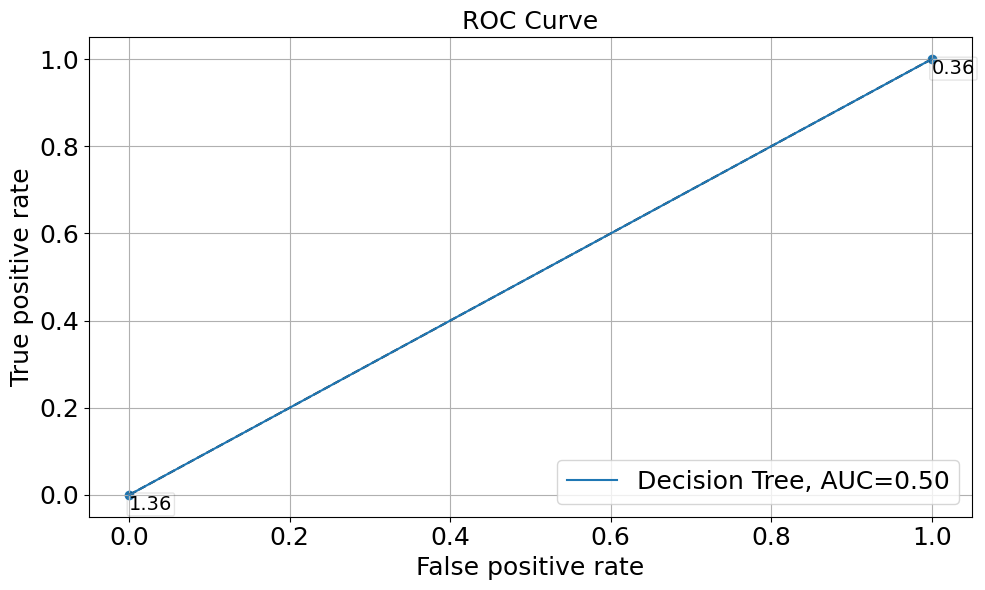

In [53]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(nn_clf, X_test, Y_test, "Decision Tree", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# TEST DATA PREP

In [54]:
test['Age']=test[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

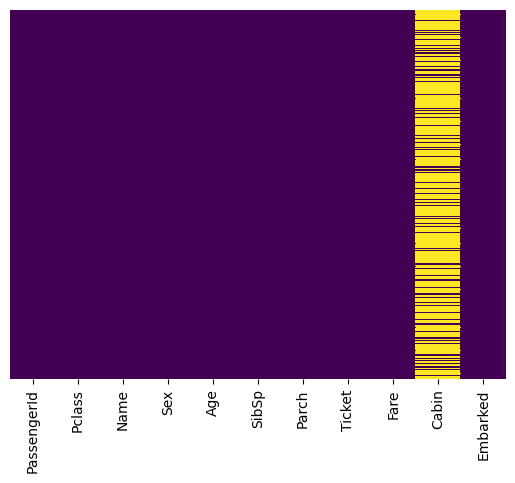

In [55]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [56]:
test.drop(['Cabin'],axis=1,inplace=True)

In [57]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

<AxesSubplot:>

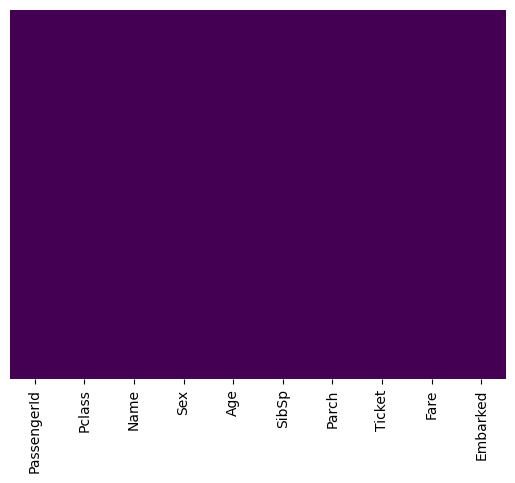

In [58]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [59]:
dumst=pd.get_dummies(test[['Sex', 'Embarked']], drop_first=True)

In [60]:
test=pd.concat([test,dumst], axis=1)

In [61]:
test.drop(['Sex', 'Embarked','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [62]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# PREDICTIONS ON SAMPLE DATA - LOGISTIC 

In [63]:
predictions1=nn_clf.predict(test)

In [64]:
predictions1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
dataset1 = pd.DataFrame(predictions1)

In [66]:
dataset1.to_csv("NN1.csv")